In [1]:
from ilqr.envs import PointMass, PointMassDm, Arm, Hopper
from matplotlib import animation
from IPython.display import HTML
import matplotlib.pyplot as plt
from ilqr.ilqr import iLQR
from tqdm import tqdm
import numpy as np
import matplotlib
import ipdb
import io

%matplotlib inline
%load_ext autoreload
%autoreload 2

# utility function

# show videos in ipython given frames
# modified from: https://colab.research.google.com/github/deepmind/dm_control/blob/master/tutorial.ipynb#scrollTo=gKc1FNhKiVJX
def display_video(frames, framerate=30):
    dpi=70
    height, width = frames[0].shape[:2]
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')  # switch to headless 'Agg' to inhibit figure rendering.
    fig, ax = plt.subplots(1, 1, figsize=(width/dpi, height/dpi), dpi=dpi);

    matplotlib.use(orig_backend)  # switch back to the original backend.
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])

    im = ax.imshow(frames[0], aspect='auto');
    def update(frame):
      im.set_data(frame)
      return [im]

    interval = 1000/framerate
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                   interval=interval, blit=True, repeat=False)
    return HTML(anim.to_html5_video())

# point mass

iteration   cost        dcost       expected    reg         status      max_action   
------------------------------------------------------------------------------------
     1/20   41.040887   -1.03e+02   -1.05e+02   6.25e-01    decreased   0.736551    
     2/20   40.114914   -9.26e-01   -1.16e+00   2.44e-01    decreased   1.024270    
     3/20   39.506080   -6.09e-01   -5.05e-01   5.96e-02    decreased   1.285923    
     4/20   34.479547   -5.03e+00   -9.85e-01   9.09e-03    decreased   1.669465    
     5/20   37.601778   +3.12e+00   -4.36e+00   1.46e-02    increased   1.669465    
     6/20   35.132343   +6.53e-01   -4.23e+00   3.73e-02    increased   1.669465    
     7/20   32.934399   -1.55e+00   -3.91e+00   2.33e-02    decreased   1.807723    
     8/20   33.222960   +2.89e-01   -3.14e+00   3.73e-02    increased   1.807723    
     9/20   32.966772   +3.24e-02   -2.88e+00   9.54e-02    increased   1.807723    
    10/20   33.197526   +2.63e-01   -2.37e+00   3.91e-01    incr

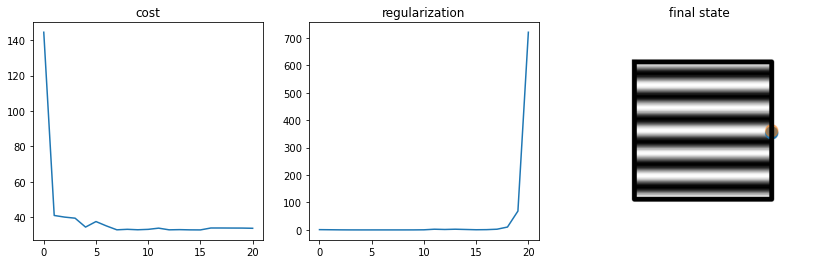

In [30]:
# run ilqr
env = PointMass(field_wgt=2e-1, field_freq=6, initial_state=(-.25,0,0,0))
env.target = np.array((.5,0))

actions, history = iLQR(env, iterations=20, reg=1, verbose=True)
ax = plt.subplots(1, 3, figsize=(14,4))[1];
ax[0].plot(history['cost']); ax[0].set_title('cost');
ax[1].plot(history['reg']);  ax[1].set_title('regularization');
ax[2].set_title('final state'); env.show(); 

In [31]:
# show video
env.reset(reset_target=False)
imgs = [env.render()]
for action in actions:
    env.step(action)
    imgs.append(env.render())
display_video(imgs, framerate=(1/env.dt))

# point mass (force field)

iteration   cost        dcost       expected    reg         status      max_action   
------------------------------------------------------------------------------------
     1/20   41.040887   -1.03e+02   -1.05e+02   6.25e-01    decreased   0.736551    
     2/20   40.114914   -9.26e-01   -1.16e+00   2.44e-01    decreased   1.024270    
     3/20   39.506080   -6.09e-01   -5.05e-01   5.96e-02    decreased   1.285923    
     4/20   34.479547   -5.03e+00   -9.85e-01   9.09e-03    decreased   1.669465    
     5/20   37.601778   +3.12e+00   -4.36e+00   1.46e-02    increased   1.669465    
     6/20   35.132343   +6.53e-01   -4.23e+00   3.73e-02    increased   1.669465    
     7/20   32.934399   -1.55e+00   -3.91e+00   2.33e-02    decreased   1.807723    
     8/20   33.222960   +2.89e-01   -3.14e+00   3.73e-02    increased   1.807723    
     9/20   32.966772   +3.24e-02   -2.88e+00   9.54e-02    increased   1.807723    
    10/20   33.197526   +2.63e-01   -2.37e+00   3.91e-01    incr

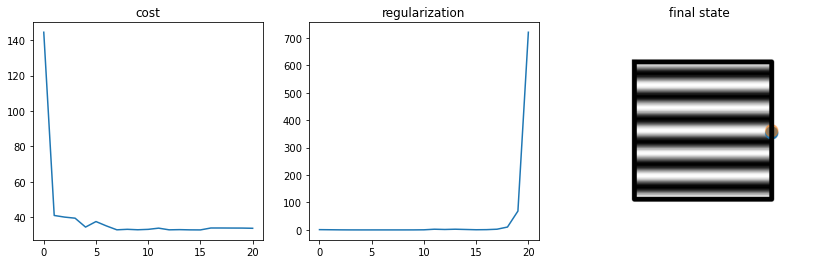

In [30]:
# run ilqr
env = PointMass(field_wgt=2e-1, field_freq=6, initial_state=(-.25,0,0,0))
env.target = np.array((.5,0))

actions, history = iLQR(env, iterations=20, reg=1, verbose=True)
ax = plt.subplots(1, 3, figsize=(14,4))[1];
ax[0].plot(history['cost']); ax[0].set_title('cost');
ax[1].plot(history['reg']);  ax[1].set_title('regularization');
ax[2].set_title('final state'); env.show(); 

# point mass (`dm_control`)

iteration   cost        dcost       expected    reg         status      max_action   
------------------------------------------------------------------------------------
     0/10   1.561415    -6.97e-02   -6.94e-02   6.25e-01    decreased   0.994453    
     1/10   1.458657    -1.03e-01   -1.03e-01   2.44e-01    decreased   0.998546    
     2/10   1.258838    -2.00e-01   -2.11e-01   5.96e-02    decreased   1.007330    
     3/10   0.963358    -2.95e-01   -3.66e-01   9.09e-03    decreased   1.052802    
     4/10   0.700418    -2.63e-01   -4.08e-01   8.67e-04    decreased   3.057592    
     5/10   0.623002    -7.74e-02   -1.28e-01   5.17e-05    decreased   5.365265    
     6/10   1.376920    +7.54e-01   -7.72e-02   8.27e-05    increased   5.365265    
     7/10   1.182903    +5.60e-01   -6.65e-02   2.12e-04    increased   5.365265    
     8/10   0.717660    +9.47e-02   -5.11e-02   8.67e-04    increased   5.365265    
     9/10   0.614559    -8.44e-03   -3.26e-02   5.42e-04    decr

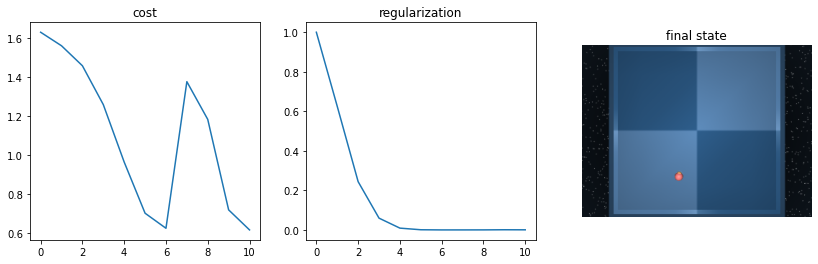

In [540]:
# run ilqr
env = PointMassDm()
actions, history = iLQR(env, iterations=10, reg=1, verbose=True)
ax = plt.subplots(1, 3, figsize=(14,4))[1];
ax[0].plot(history['cost']); ax[0].set_title('cost');
ax[1].plot(history['reg']);  ax[1].set_title('regularization');
ax[2].set_title('final state'); env.show(); 

In [541]:
# show video
env.reset(reset_target=False)
imgs= [env.render()]
for action in actions:
    env.step(action)
    imgs.append(env.render())
display_video(imgs, framerate=(1/env.dt))

# two link arm

iteration   cost        dcost       expected    reg         status      max_action   
------------------------------------------------------------------------------------
     1/10   3.607750    -1.33e+00   -1.43e+00   1.02e+01    decreased   0.097530    
     2/10   2.234578    -1.37e+00   -1.52e+00   4.00e+00    decreased   0.176206    
     3/10   1.492953    -7.42e-01   -7.82e-01   9.77e-01    decreased   0.258218    
     4/10   1.057819    -4.35e-01   -4.80e-01   1.49e-01    decreased   0.450220    
     5/10   0.798766    -2.59e-01   -3.52e-01   1.42e-02    decreased   0.936725    
     6/10   0.726410    -7.24e-02   -1.49e-01   8.47e-04    decreased   1.737995    
     7/10   0.724326    -2.08e-03   -1.07e-02   3.16e-05    decreased   2.026789    
     8/10   1.878665    +1.15e+00   -6.51e-02   5.05e-05    increased   2.026789    
     9/10   1.752985    +1.03e+00   -4.46e-02   1.29e-04    increased   2.026789    
    10/10   1.667911    +9.44e-01   -2.05e-02   5.29e-04    incr

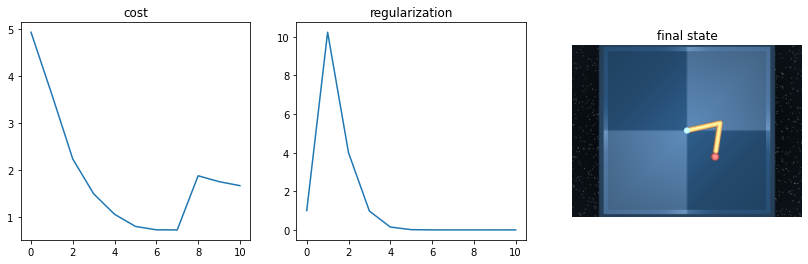

In [188]:
# run ilqr
env = Arm()
actions, history = iLQR(env, iterations=10, reg=1, alpha=1, verbose=True, reg_lims=(1e-6, 1e10))
ax = plt.subplots(1, 3, figsize=(14,4))[1];
ax[0].plot(history['cost']); ax[0].set_title('cost');
ax[1].plot(history['reg']);  ax[1].set_title('regularization');
ax[2].set_title('final state'); env.show(); 

In [189]:
# show video
env.reset(reset_target=False)
imgs = [env.render()]
for action in actions:
    env.step(action)
    imgs.append(env.render())
display_video(imgs, framerate=(1/env.dt))


# hopper

iteration   cost        dcost       expected    reg         status      max_action   
------------------------------------------------------------------------------------
     1/10   56.204892   -4.47e-01   -9.08e+00   8.39e+01    decreased   0.068827    
     2/10   44.716334   -1.15e+01   -7.67e+00   3.28e+01    decreased   0.049264    
     3/10   28.794451   -1.59e+01   -6.79e+00   8.00e+00    decreased   0.122459    
     4/10   27.984000   -8.10e-01   -1.15e+00   1.22e+00    decreased   0.203373    
     5/10   27.269455   -7.15e-01   -5.94e-01   1.16e-01    decreased   0.153996    
     6/10   27.194249   -7.52e-02   -1.17e-01   6.94e-03    decreased   0.231838    
     7/10   27.139865   -5.44e-02   -6.76e-02   2.58e-04    decreased   0.753283    
     8/10   27.288032   +1.48e-01   -1.27e-02   4.14e-04    increased   0.753283    
     9/10   27.159966   +2.01e-02   -1.11e-02   1.06e-03    increased   0.753283    
    10/10   27.141331   +1.47e-03   -7.84e-03   4.34e-03    incr

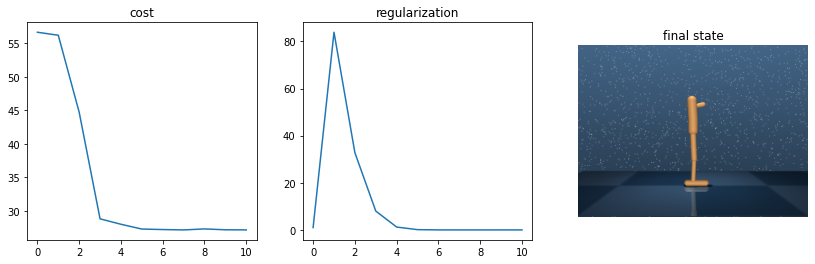

In [183]:
# run ilqr
env = Hopper(control_wgt=1e-3)
actions, history = iLQR(env, iterations=10, reg=1, alpha=1, verbose=True)
ax = plt.subplots(1, 3, figsize=(14,4))[1];
ax[0].plot(history['cost']); ax[0].set_title('cost');
ax[1].plot(history['reg']);  ax[1].set_title('regularization');
ax[2].set_title('final state'); env.show(); 

In [184]:
# show video
env.reset(reset_target=False)
imgs = [env.render()]
data = []
for action in actions:
    env.step(action)
    imgs.append(env.render())
    data.append(env.state[1])
display_video(imgs, framerate=(1/env.dt/2))


In [154]:
# see what happens with no actions
# (use to tune max_steps and n_sub_steps)
env = Hopper()
imgs = [env.render()]
for action in range(env.max_steps):
    env.step(np.repeat(0, env.action_dim))
    imgs.append(env.render())
display_video(imgs, framerate=(1/env.dt))